# 0.0. BUSINESS

|Description | Feature Type | Feature | Data Type |
|---|---|---|---|
|Age | Objective Feature | age | int (days)|
|Height | Objective Feature | height | int (cm) |
|Weight | Objective Feature | weight | float (kg) |
|Gender | Objective Feature | gender | categorical code |
|Systolic blood pressure | Examination Feature | ap_hi | int |
|Diastolic blood pressure | Examination Feature | ap_lo | int |
|Cholesterol | Examination Feature | cholesterol | 1: normal, 2: above normal, 3: well above normal |
|Glucose | Examination Feature | gluc | 1: normal, 2: above normal, 3: well above normal |
|Smoking | Subjective Feature | smoke | binary |
|Alcohol intake | Subjective Feature | alco | binary |
|Physical activity | Subjective Feature | active | binary |
|Presence or absence of cardiovascular disease | Target Variable | cardio | binary |

for binary data:
1: Positive/ 0: Negative

## 1.0. IMPORTS

In [52]:
import pandas as pd
import math
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

## 1.1. Helper Functions

In [58]:
def jupyter_settings():
    
    plt.style.use( 'bmh' )
    plt.rcParams['figure.figsize'] = [25, 12]
    plt.rcParams['font.size'] = 24
    
    sns.set()

In [60]:
jupyter_settings()

## 1.2. Import Data

In [61]:
df1 = pd.read_csv('data/cardio_train.csv', sep=';', index_col= 'id')

In [62]:
df1.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
id,,,,,,,,,,,,
0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,17474,1,156,56.0,100,60,1,1,0,0,0,0


# 2.0. DATA DESCRIPTION

In [109]:
df2 = df1.copy()

## 2.1. Data Dimension

In [110]:
print('Number of rows: {}'.format(df2.shape[0]))
print('Number of columns: {}'.format(df2.shape[1]))

Number of rows: 70000
Number of columns: 12


## 2.2. Data Types

In [111]:
df2.dtypes

age              int64
gender           int64
height           int64
weight         float64
ap_hi            int64
ap_lo            int64
cholesterol      int64
gluc             int64
smoke            int64
alco             int64
active           int64
cardio           int64
dtype: object

All data types is ok, we only need to change the age of days to years.

In [112]:
df2['age'] = round(df2['age'] / 365) # rounding the ages

## 2.3. Check NA

In [113]:
df2.isna().sum()

age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

The data no have missing Data

## 2.4. Statistical Description - Features

In [114]:
class_var = df2[['cholesterol', 'gender', 'gluc', 'smoke', 'alco', 'active']].copy()
num_var = df2[['age', 'height', 'weight', 'ap_hi', 'ap_lo']]

### 2.4.1. Variable Response

<AxesSubplot:xlabel='cardio', ylabel='count'>

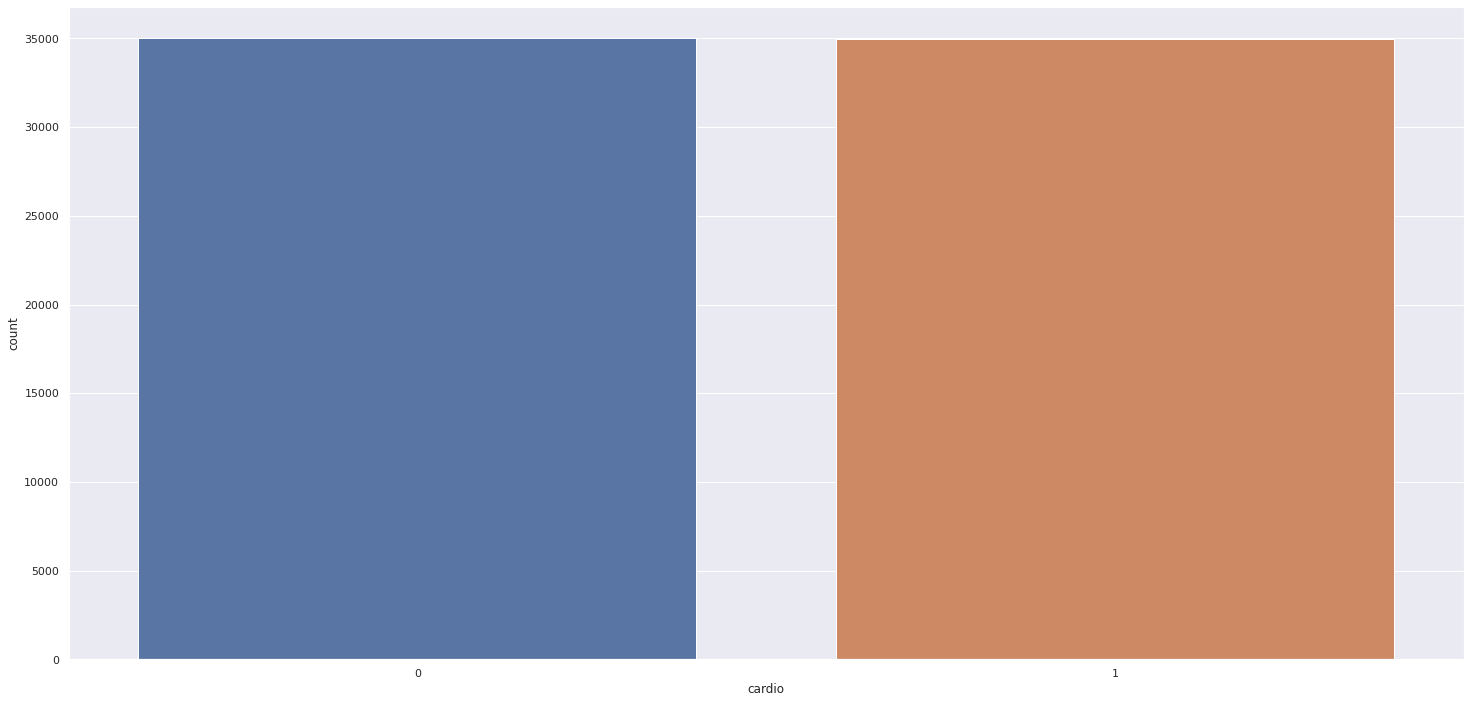

In [115]:
sns.countplot(x=df2['cardio'])

In [116]:
print(df2['cardio'].value_counts(normalize=True))

0    0.5003
1    0.4997
Name: cardio, dtype: float64


* 50% to the each response
* The variable response is balanced;



### 2.4.2 Numerical Variables

In [117]:
num_var.describe().T

,count,mean,std,min,25%,50%,75%,max
age,70000.0,53.338686,6.765294,30.0,48.0,54.0,58.0,65.0
height,70000.0,164.359229,8.210126,55.0,159.0,165.0,170.0,250.0
weight,70000.0,74.205690,14.395757,10.0,65.0,72.0,82.0,200.0
ap_hi,70000.0,128.817286,154.011419,-150.0,120.0,120.0,140.0,16020.0
ap_lo,70000.0,96.630414,188.472530,-70.0,80.0,80.0,90.0,11000.0


#### 2.4.2.1. Age

<AxesSubplot:xlabel='age', ylabel='count'>

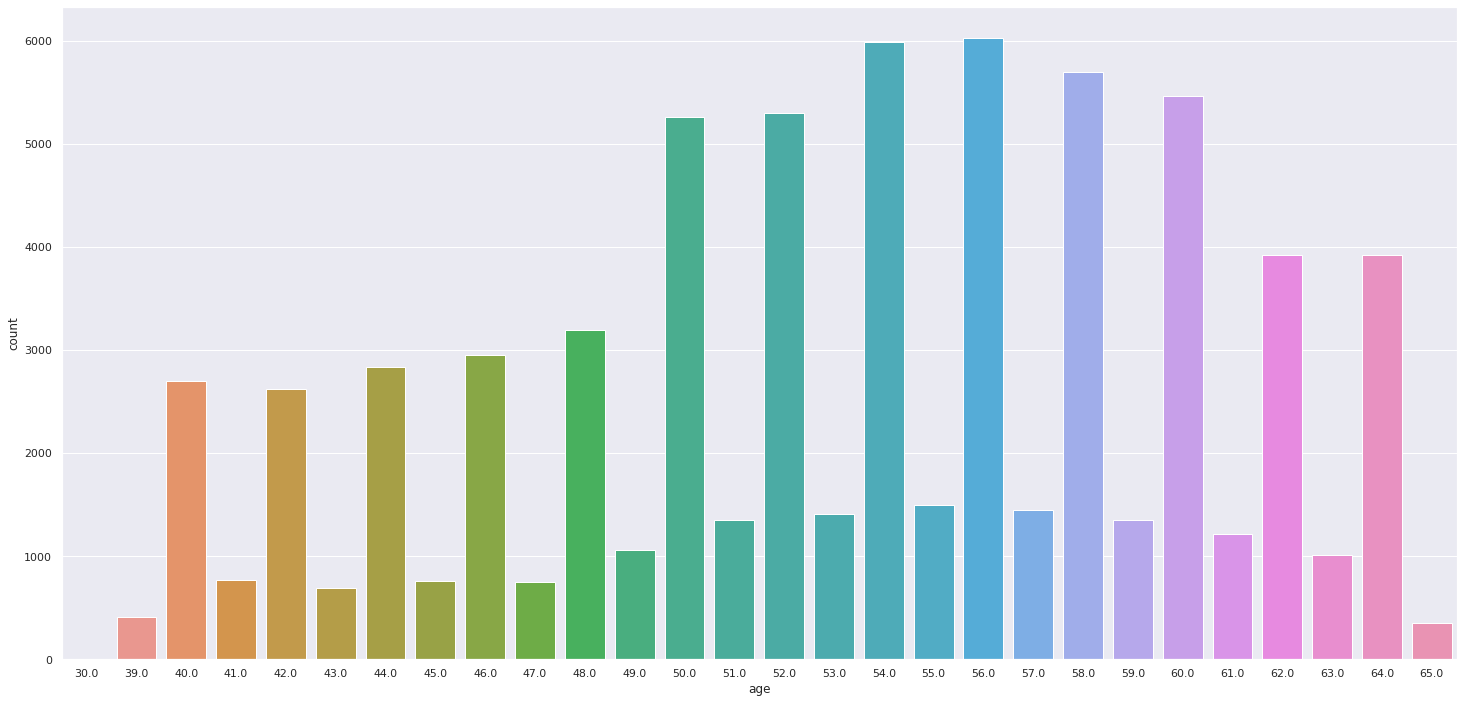

In [118]:
sns.countplot(x='age', data=df2)